In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
# from small_script.myFunctions import *



%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
plt.rcParams['figure.figsize'] = [16.18033, 10]
def get_data(pre, pdb_list, simType="all_simulations"):
    # to get last 20 frame of each run
    _all = []
    for p in pdb_list:
        name = p.lower()[:4]
        for i in range(30):
            for ii in range(1):
                location = pre + f"{simType}/{name}/simulation/{i}/{ii}/wham.dat"
                try:
                    tmp = pd.read_csv(location).tail(50).reset_index()
                    tmp.columns = tmp.columns.str.strip()
                    _all.append(tmp.assign(Run=i, Name=name, Rerun=ii))
                except Exception as e: 
                    print(e)
    data = pd.concat(_all)
    data["Run"] = "Run" + data["Run"].astype(str)
    return data

In [21]:
pre = "/Users/weilu/Research/server/feb_2019/optimization_iter1/database/2gb1/"
fileName = "movie.pdb"
def splitPDB(pre, fileName):
    location = f"{pre}/{fileName}"
    with open(location, "r") as f:
        a = f.readlines()
    i = 0
    tmp = ""
    for line in a:
        tmp += line
    #     os.system(f"echo '{line}' >> {pre}frame{i}")
        if line == "END\n":
            with open(f"{pre}frame{i}.pdb", "w") as out:
                out.write(tmp)
            i += 1
            tmp = ""

In [30]:
dataset = {"old":("1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", "), 40),
            "new":("1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", "), 80),
            "test":(['1A2J', '1A3H', '1A5Y', '1A8Q', '1AGY', '1AKZ', '1AUZ', '1B1A', '1B31', '1B8X', '1BCO', '1BN6', '1BOH', '1BOI'], 80)}
# pdb_list, steps = dataset["old"]


In [41]:
import subprocess
def getFromTerminal(CMD):
    return subprocess.Popen(CMD,stdout=subprocess.PIPE,shell=True).communicate()[0].decode()
def getSize(p):
    protein = p.lower()[:4]
    pre = f"/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/all_simulations/{protein}/{protein}/ssweight"
    a = getFromTerminal(f"wc {pre}")
#     print(a)
    n = int(a.split()[0])
    return n

In [73]:
data = pd.read_csv("/Users/weilu/Research/library/test_protein_size_data.csv", index_col=0)
data.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
protein,1A2J,1A3H,1A5Y,1A8Q,1AGY,1AKZ,1AUZ,1B1A,1B31,1B8X,1BCO,1BN6,1BOH,1BOI
size,188,300,284,274,197,223,116,137,302,260,303,291,293,286


In [88]:
Q = pd.read_csv("/Users/weilu/Research/server/feb_2019/optimization_iter1/database/1ctf_0/wham.dat")[" Qw"].values

In [91]:
Q[1999]

0.59191041745176

In [92]:
[1,2] * 2

[1, 2, 1, 2]

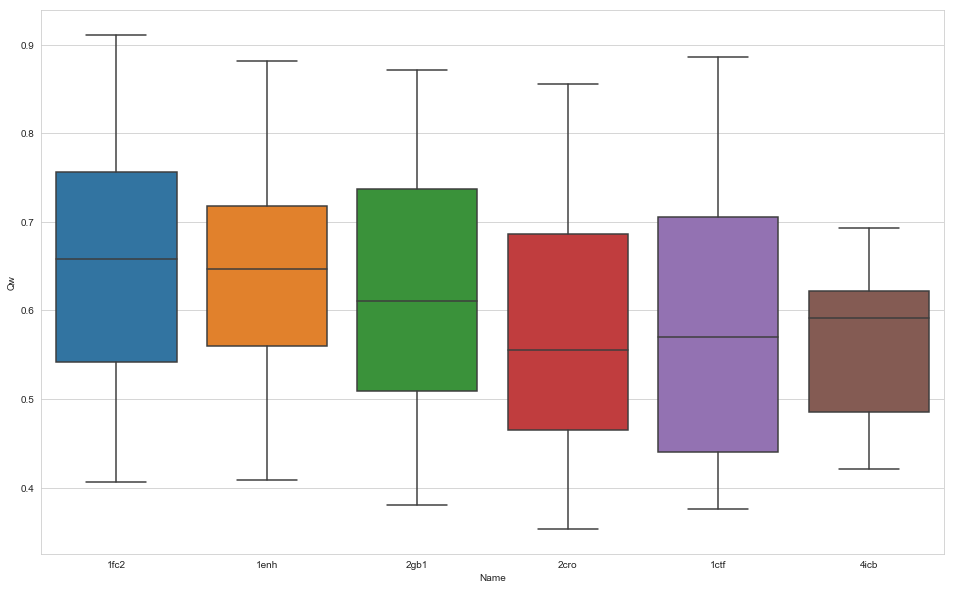

In [83]:
pre = "/Users/weilu/Research/server/feb_2019/iterative_optimization_biased_sampling/"
simulationType = "bias_2"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list, steps = dataset["new"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

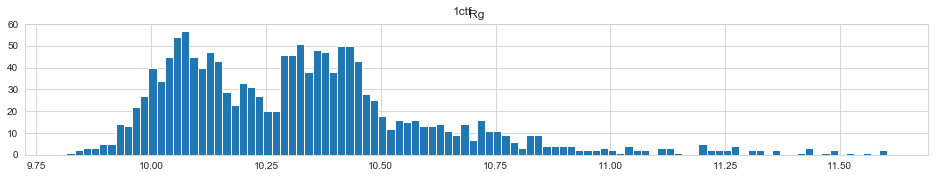

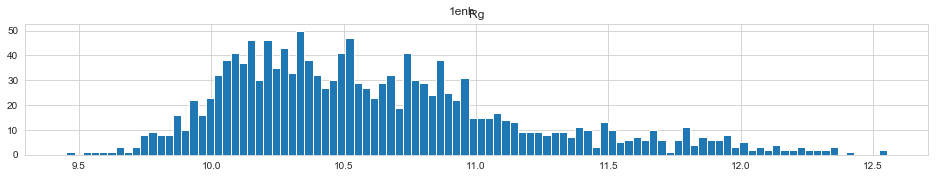

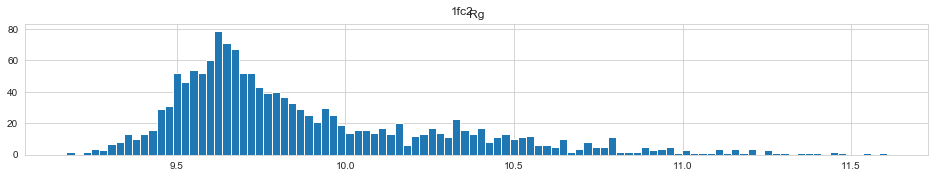

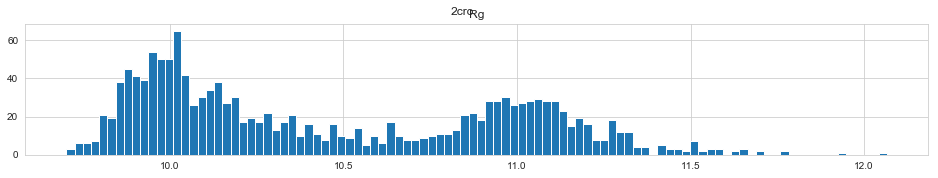

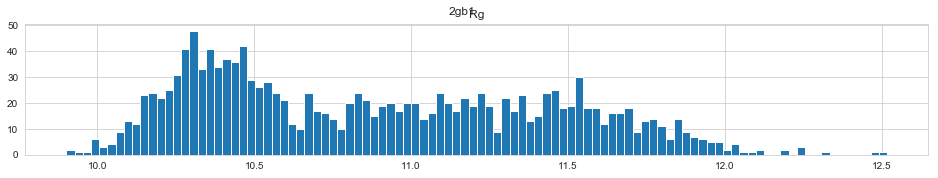

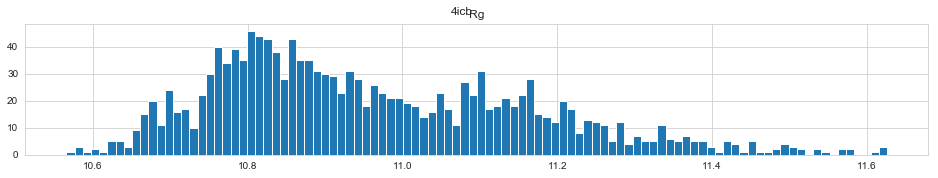

In [115]:
import matplotlib.pyplot as plt
import pylab as pl
plt.rcParams['figure.figsize'] = [16.18033, 2.4]
for title1, group in data.groupby("Name"):
    group.hist("Rg", bins=100, sharey=True, sharex=True)
    pl.suptitle(title1)

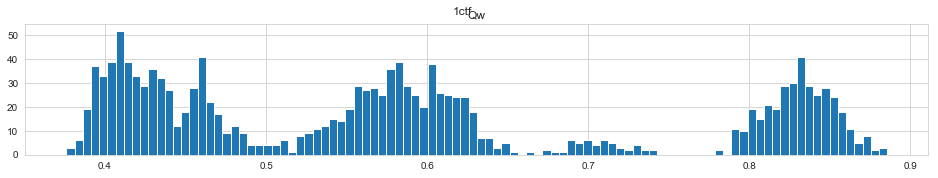

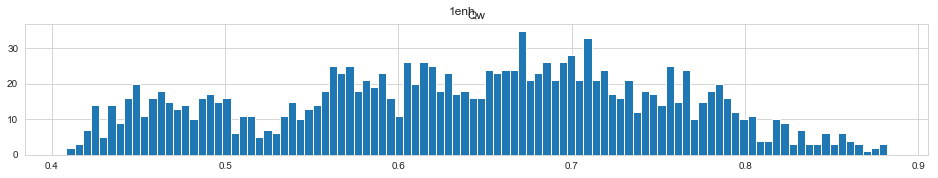

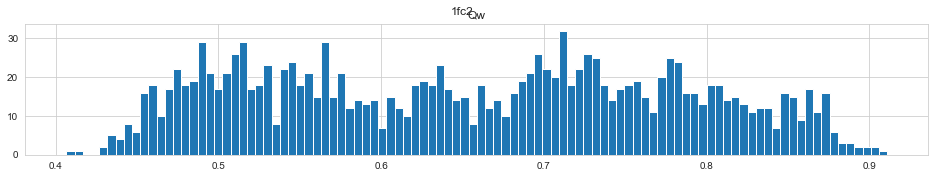

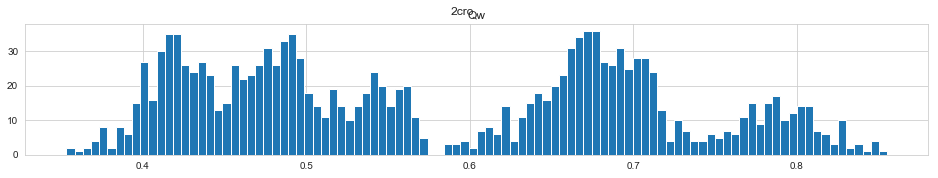

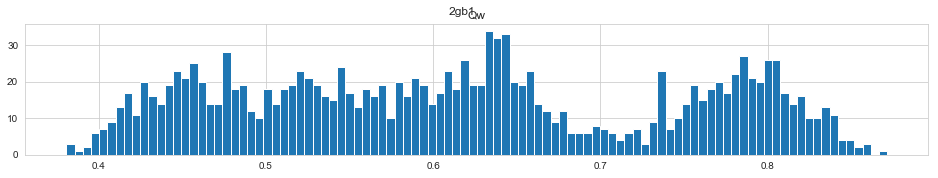

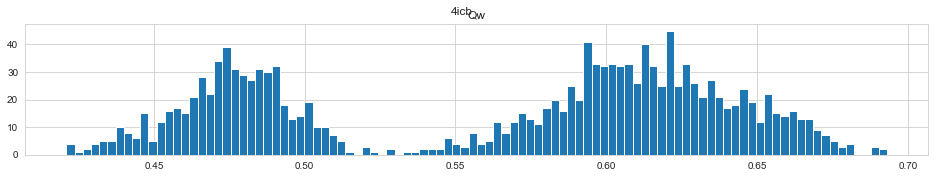

In [113]:
import matplotlib.pyplot as plt
import pylab as pl
plt.rcParams['figure.figsize'] = [16.18033, 2.4]
for title1, group in data.groupby("Name"):
    group.hist("Qw", bins=100, sharey=True, sharex=True)
    pl.suptitle(title1)

In [ ]:
for i in data.

Name
1ctf    AxesSubplot(0.125,0.125;0.775x0.755)
1enh    AxesSubplot(0.125,0.125;0.775x0.755)
1fc2    AxesSubplot(0.125,0.125;0.775x0.755)
2cro    AxesSubplot(0.125,0.125;0.775x0.755)
2gb1    AxesSubplot(0.125,0.125;0.775x0.755)
4icb    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Qw, dtype: object

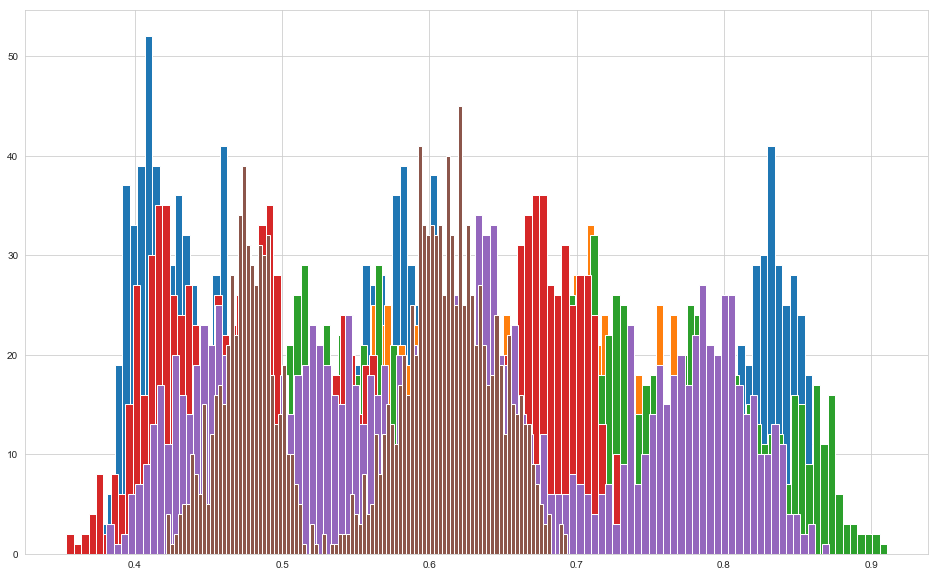

In [100]:
data.groupby("Name")["Qw"].hist(bins=100)

In [93]:
sns.hist("Name", "Qw", data=data)

AttributeError: module 'seaborn' has no attribute 'hist'

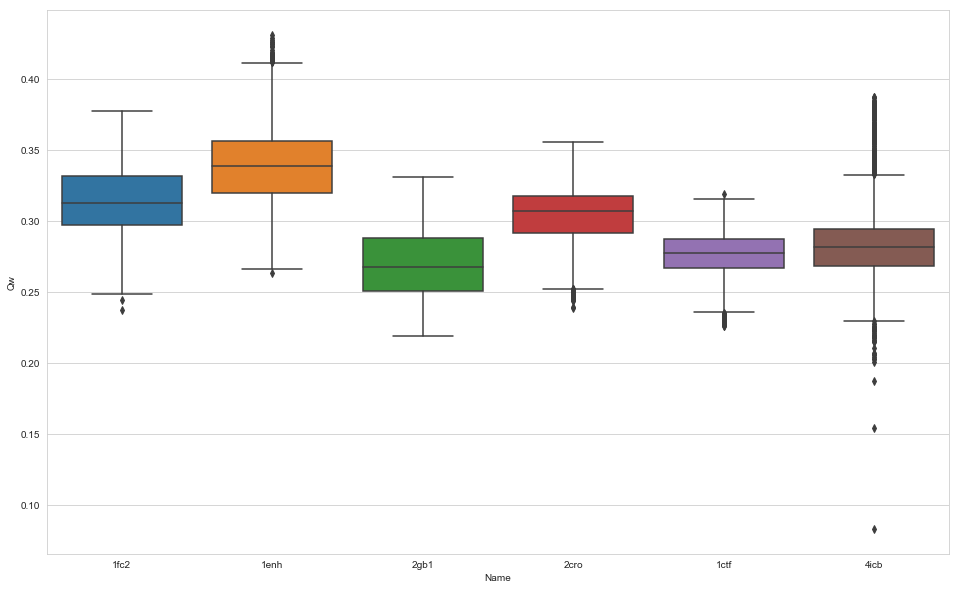

In [81]:
pre = "/Users/weilu/Research/server/feb_2019/iterative_optimization_new_temp_range/"
simulationType = "iter1_2"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list, steps = dataset["new"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

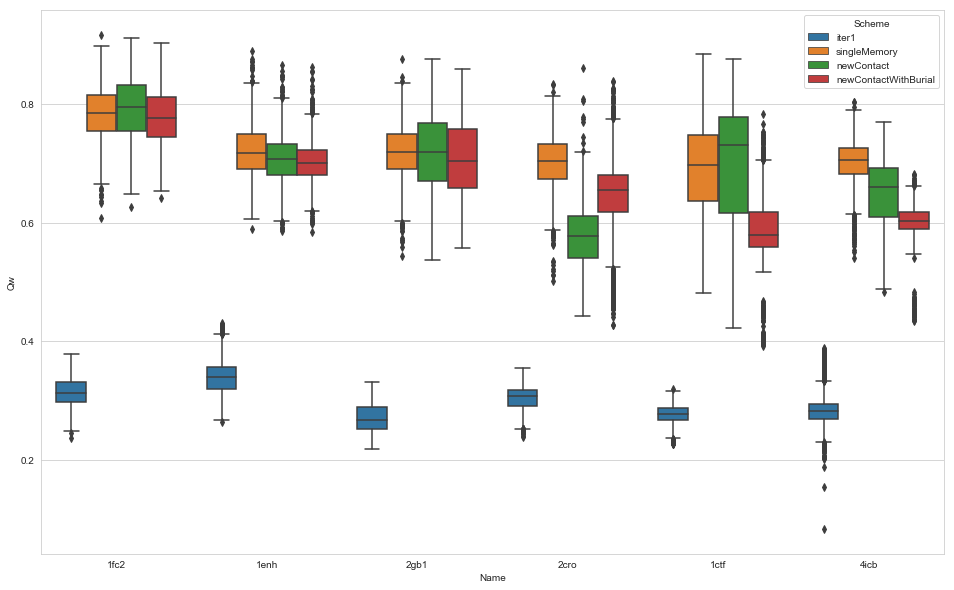

In [82]:
data = pd.read_csv("/Users/weilu/Research/data/optimization/iter1_2_03-01.csv", index_col=0)
data2 = pd.read_csv("/Users/weilu/Research/data/optimization/single_02-20.csv", index_col=0)
data3 = pd.read_csv("/Users/weilu/Research/data/optimization/newContact_02-20.csv", index_col=0)
data4 = pd.read_csv("/Users/weilu/Research/data/optimization/top20_02-20.csv", index_col=0)
data5 = pd.read_csv("/Users/weilu/Research/data/optimization/newContactWithBurial_02-23.csv", index_col=0)
data6 = pd.read_csv("/Users/weilu/Research/data/optimization/filtered_gamma_iter1_02-13.csv", index_col=0)
data7 = pd.read_csv("/Users/weilu/Research/data/optimization/iter2_02-15.csv", index_col=0)
# d = pd.concat([data.assign(Scheme="single_memory"), data4.assign(Scheme="No contact")
#               , data2.assign(Scheme="fragMemory"), data3.assign(Scheme="newContact"), 
#                data5.assign(Scheme="iter1")
#               ])
d = pd.concat([
                data.assign(Scheme="iter1"), 
                   data2.assign(Scheme="singleMemory"), 
                 data3.assign(Scheme="newContact"), 
#                data4.assign(Scheme="Top20, New Frag"),
               data5.assign(Scheme="newContactWithBurial"),
#                data6.assign(Scheme="filtered_iter1"),
#                data7.assign(Scheme="iter2")
              ])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)

[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1a2j/simulation/3/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1a2j/simulation/3/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1a2j/simulation/4/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1a2j/simulation/4/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1a2j/simulation/5/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1a2j/simulation/5/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1a2j/simulation/6/0/wham.dat' does not exist: b'/Users/weilu/

[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1a5y/simulation/3/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1a5y/simulation/3/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1a5y/simulation/4/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1a5y/simulation/4/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1a5y/simulation/5/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1a5y/simulation/5/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1a5y/simulation/6/0/wham.dat' does not exist: b'/Users/weilu/

[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1agy/simulation/3/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1agy/simulation/3/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1agy/simulation/4/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1agy/simulation/4/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1agy/simulation/5/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1agy/simulation/5/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1agy/simulation/6/0/wham.dat' does not exist: b'/Users/weilu/

[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1auz/simulation/3/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1auz/simulation/3/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1auz/simulation/4/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1auz/simulation/4/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1auz/simulation/5/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1auz/simulation/5/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1auz/simulation/6/0/wham.dat' does not exist: b'/Users/weilu/

[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1b31/simulation/3/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1b31/simulation/3/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1b31/simulation/4/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1b31/simulation/4/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1b31/simulation/5/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1b31/simulation/5/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1b31/simulation/6/0/wham.dat' does not exist: b'/Users/weilu/

[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1bco/simulation/3/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1bco/simulation/3/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1bco/simulation/4/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1bco/simulation/4/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1bco/simulation/5/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1bco/simulation/5/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1bco/simulation/6/0/wham.dat' does not exist: b'/Users/weilu/

[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1boh/simulation/3/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1boh/simulation/3/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1boh/simulation/4/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1boh/simulation/4/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1boh/simulation/5/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1boh/simulation/5/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/newContactWithBurial/1boh/simulation/6/0/wham.dat' does not exist: b'/Users/weilu/

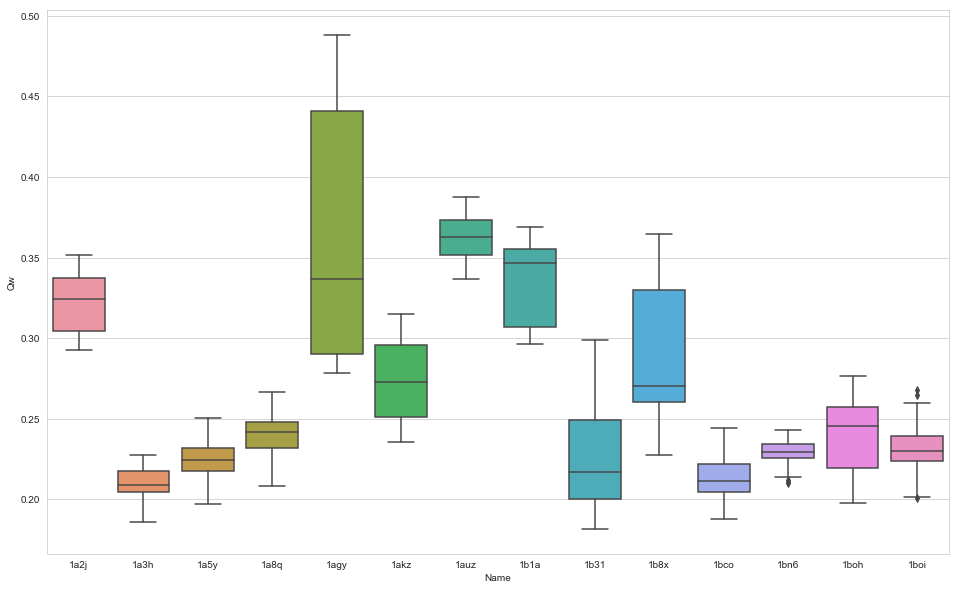

In [33]:
pre = "/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/"
simulationType = "newContactWithBurial"
today = datetime.datetime.today().strftime('%m-%d')
pdb_list, steps = dataset["test"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1a2j/simulation/3/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1a2j/simulation/3/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1a2j/simulation/4/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1a2j/simulation/4/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1a2j/simulation/5/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1a2j/simulation/5/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1a2j/simulation/6/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1a2j/simulation/6/0/wham.dat'
[Err

[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1a5y/simulation/3/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1a5y/simulation/3/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1a5y/simulation/4/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1a5y/simulation/4/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1a5y/simulation/5/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1a5y/simulation/5/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1a5y/simulation/6/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1a5y/simulation/6/0/wham.dat'
[Err

[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1agy/simulation/3/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1agy/simulation/3/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1agy/simulation/4/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1agy/simulation/4/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1agy/simulation/5/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1agy/simulation/5/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1agy/simulation/6/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1agy/simulation/6/0/wham.dat'
[Err

[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1auz/simulation/3/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1auz/simulation/3/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1auz/simulation/4/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1auz/simulation/4/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1auz/simulation/5/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1auz/simulation/5/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1auz/simulation/6/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1auz/simulation/6/0/wham.dat'
[Err

[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1b31/simulation/3/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1b31/simulation/3/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1b31/simulation/4/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1b31/simulation/4/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1b31/simulation/5/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1b31/simulation/5/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1b31/simulation/6/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1b31/simulation/6/0/wham.dat'
[Err

[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1bco/simulation/3/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1bco/simulation/3/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1bco/simulation/4/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1bco/simulation/4/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1bco/simulation/5/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1bco/simulation/5/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1bco/simulation/6/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1bco/simulation/6/0/wham.dat'
[Err

[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1boh/simulation/3/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1boh/simulation/3/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1boh/simulation/4/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1boh/simulation/4/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1boh/simulation/5/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1boh/simulation/5/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1boh/simulation/6/0/wham.dat' does not exist: b'/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/single/1boh/simulation/6/0/wham.dat'
[Err

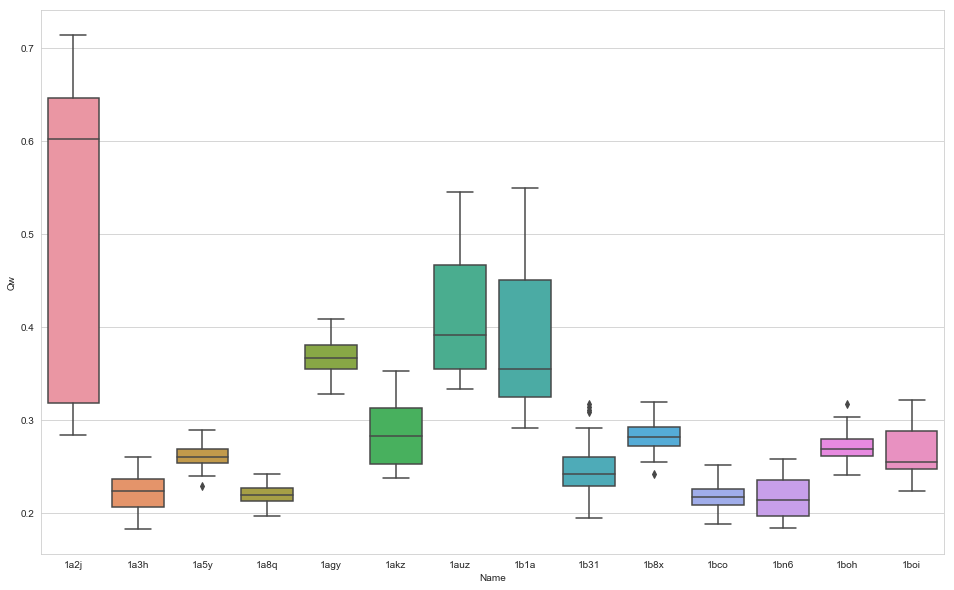

In [35]:
pre = "/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/"
simulationType = "single"
today = datetime.datetime.today().strftime('%m-%d')
pdb_list, steps = dataset["test"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

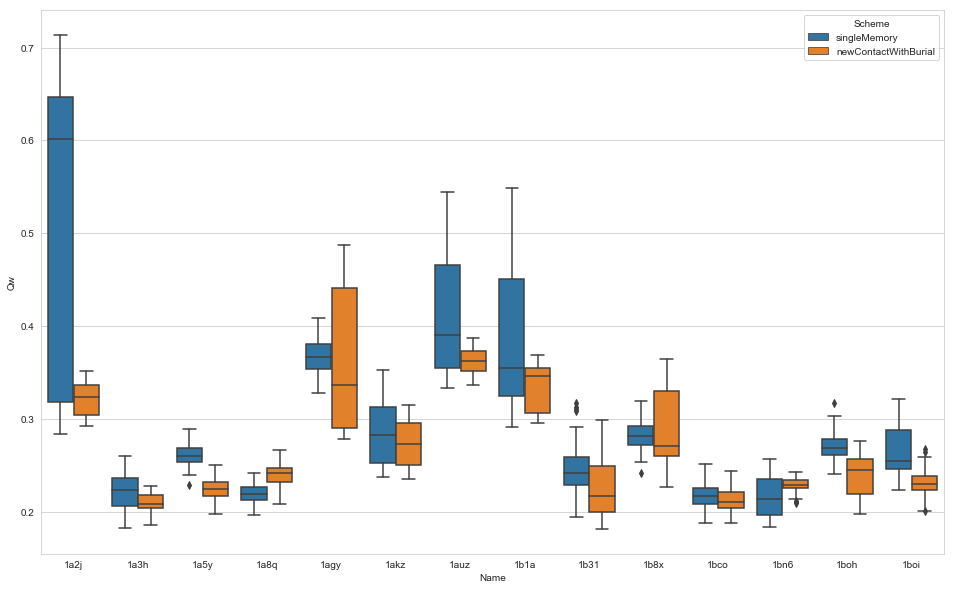

In [37]:
data = pd.read_csv("/Users/weilu/Research/data/optimization/single_02-27.csv", index_col=0)
data2 = pd.read_csv("/Users/weilu/Research/data/optimization/newContactWithBurial_02-27.csv", index_col=0)
data3 = pd.read_csv("/Users/weilu/Research/data/optimization/newContact_02-20.csv", index_col=0)
data4 = pd.read_csv("/Users/weilu/Research/data/optimization/top20_02-20.csv", index_col=0)
data5 = pd.read_csv("/Users/weilu/Research/data/optimization/newContactWithBurial_02-23.csv", index_col=0)
data6 = pd.read_csv("/Users/weilu/Research/data/optimization/filtered_gamma_iter1_02-13.csv", index_col=0)
# data7 = pd.read_csv("/Users/weilu/Research/data/optimization/iter2_02pwd-15.csv", index_col=0)
# d = pd.concat([data.assign(Scheme="single_memory"), data4.assign(Scheme="No contact")
#               , data2.assign(Scheme="fragMemory"), data3.assign(Scheme="newContact"), 
#                data5.assign(Scheme="iter1")
#               ])
d = pd.concat([
#                 data.assign(Scheme="single_memory"), 
                   data.assign(Scheme="singleMemory"), 
#                  data3.assign(Scheme="newContact"), 
#                data4.assign(Scheme="Top20, New Frag"),
               data2.assign(Scheme="newContactWithBurial"),
#                data6.assign(Scheme="filtered_iter1"),
#                data7.assign(Scheme="iter2")
              ])

sns.boxplot("Name", "Qw", hue="Scheme", data=d)

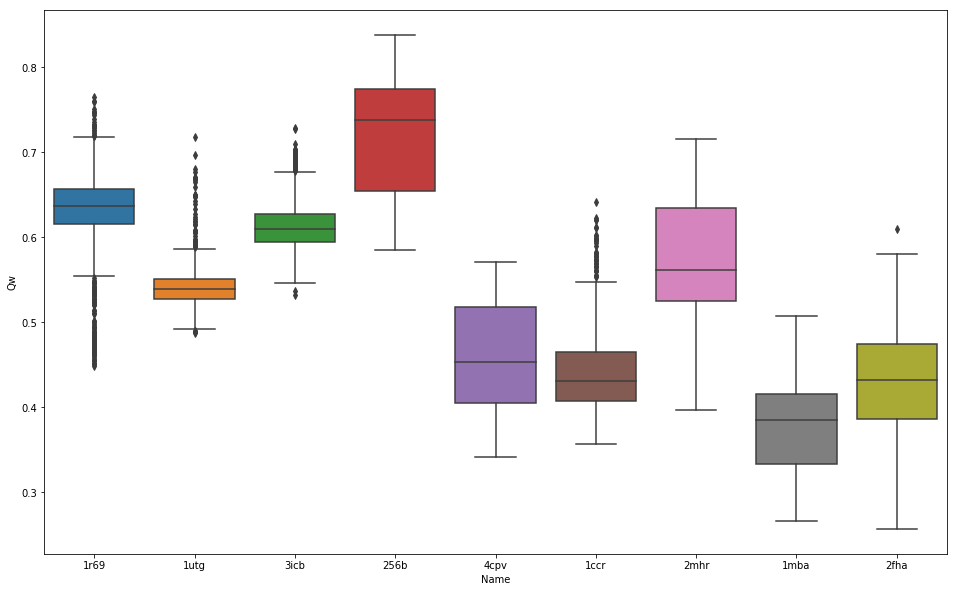

In [17]:
pre = "/Users/weilu/Research/server/feb_2019/iterative_optimization_old_set/"
simulationType = "newContactWithBurial"
today = datetime.datetime.today().strftime('%m-%d')
pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

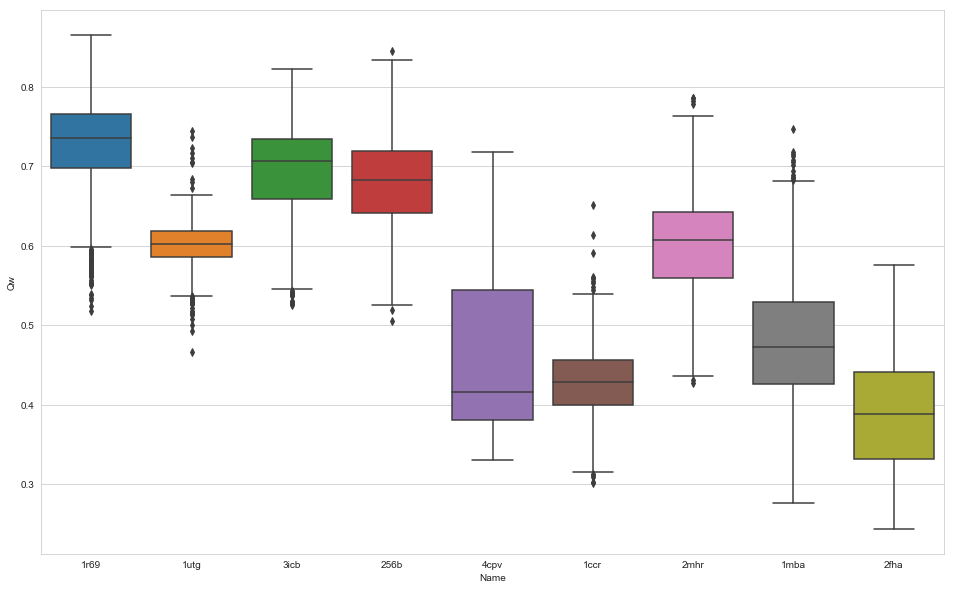

In [27]:
pre = "/Users/weilu/Research/server/feb_2019/iterative_optimization_old_set/"
simulationType = "single"
today = datetime.datetime.today().strftime('%m-%d')
pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

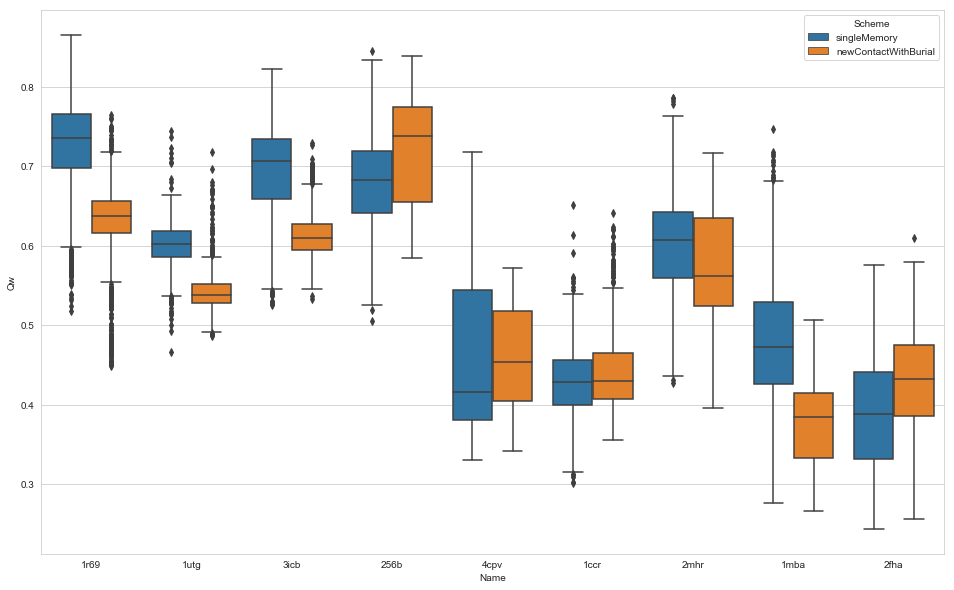

In [29]:
data = pd.read_csv("/Users/weilu/Research/data/optimization/single_02-25.csv", index_col=0)
data2 = pd.read_csv("/Users/weilu/Research/data/optimization/newContactWithBurial_02-25.csv", index_col=0)
data3 = pd.read_csv("/Users/weilu/Research/data/optimization/newContact_02-20.csv", index_col=0)
data4 = pd.read_csv("/Users/weilu/Research/data/optimization/top20_02-20.csv", index_col=0)
data5 = pd.read_csv("/Users/weilu/Research/data/optimization/newContactWithBurial_02-23.csv", index_col=0)
data6 = pd.read_csv("/Users/weilu/Research/data/optimization/filtered_gamma_iter1_02-13.csv", index_col=0)
# data7 = pd.read_csv("/Users/weilu/Research/data/optimization/iter2_02pwd-15.csv", index_col=0)
# d = pd.concat([data.assign(Scheme="single_memory"), data4.assign(Scheme="No contact")
#               , data2.assign(Scheme="fragMemory"), data3.assign(Scheme="newContact"), 
#                data5.assign(Scheme="iter1")
#               ])
d = pd.concat([
#                 data.assign(Scheme="single_memory"), 
                   data.assign(Scheme="singleMemory"), 
#                  data3.assign(Scheme="newContact"), 
#                data4.assign(Scheme="Top20, New Frag"),
               data2.assign(Scheme="newContactWithBurial"),
#                data6.assign(Scheme="filtered_iter1"),
#                data7.assign(Scheme="iter2")
              ])

sns.boxplot("Name", "Qw", hue="Scheme", data=d)

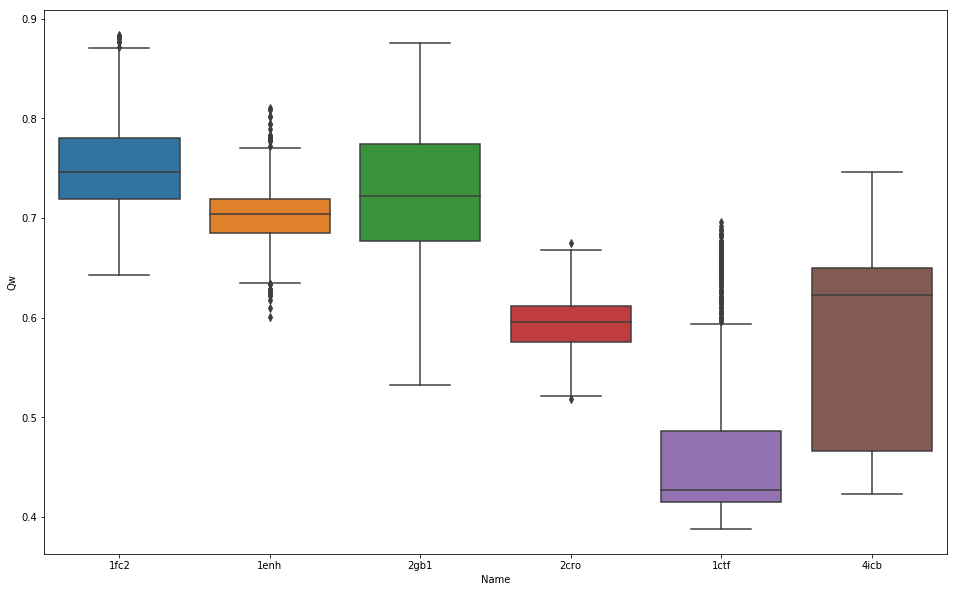

In [16]:
pre = "/Users/weilu/Research/server/feb_2019/iterative_optimization_new_temp_range/"
simulationType = "inverseBurial"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

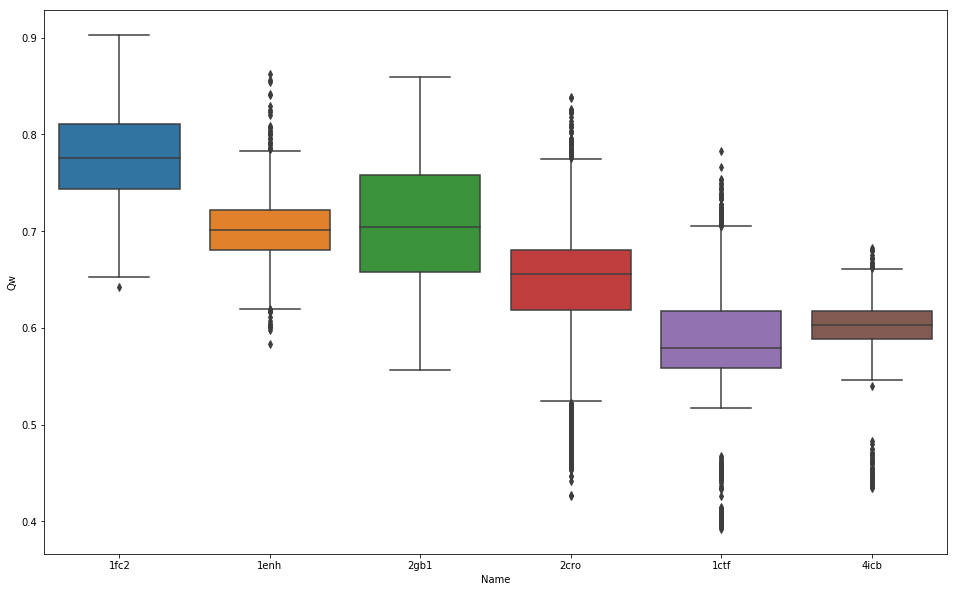

In [14]:
pre = "/Users/weilu/Research/server/feb_2019/iterative_optimization_new_temp_range/"
simulationType = "newContactWithBurial"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

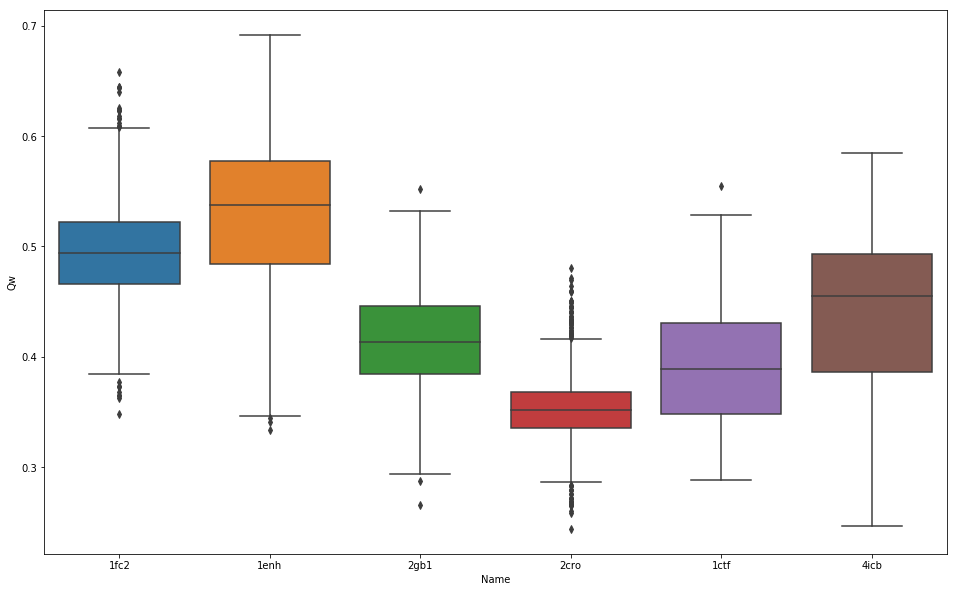

In [13]:
pre = "/Users/weilu/Research/server/feb_2019/iterative_optimization_new_temp_range/"
simulationType = "top1"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

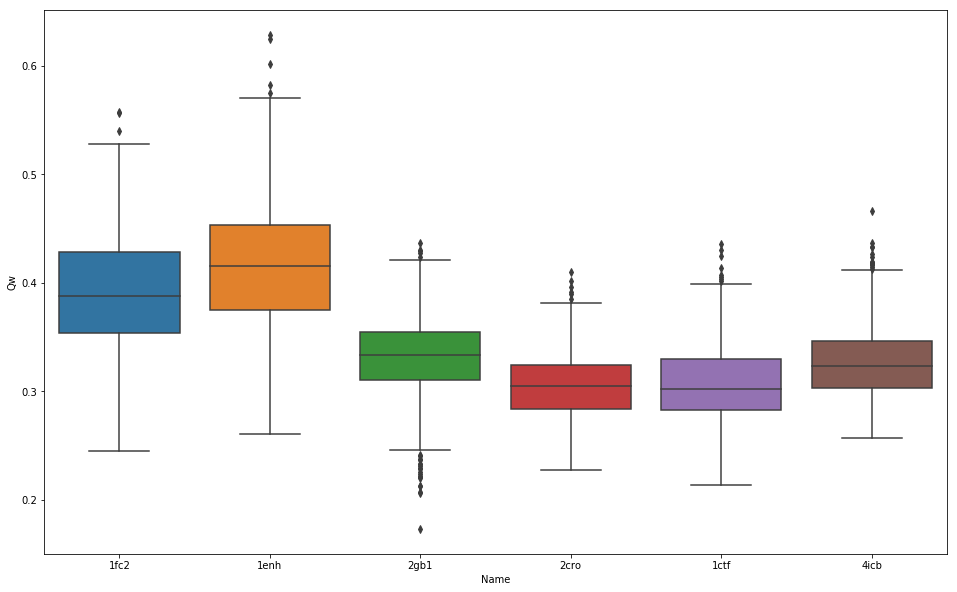

In [12]:
pre = "/Users/weilu/Research/server/feb_2019/iterative_optimization_new_temp_range/"
simulationType = "top20"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

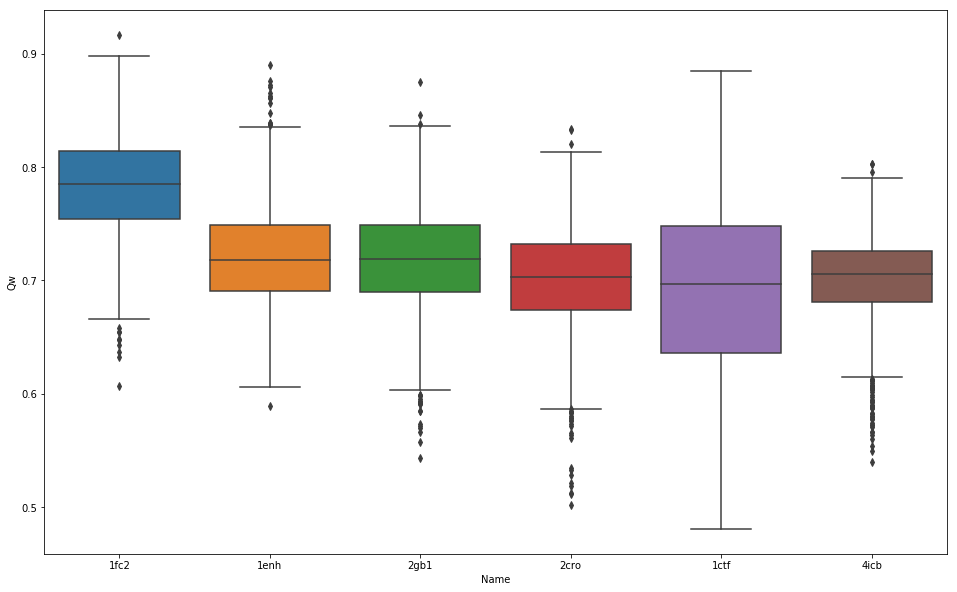

In [6]:
pre = "/Users/weilu/Research/server/feb_2019/iterative_optimization_new_temp_range/"
simulationType = "single"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

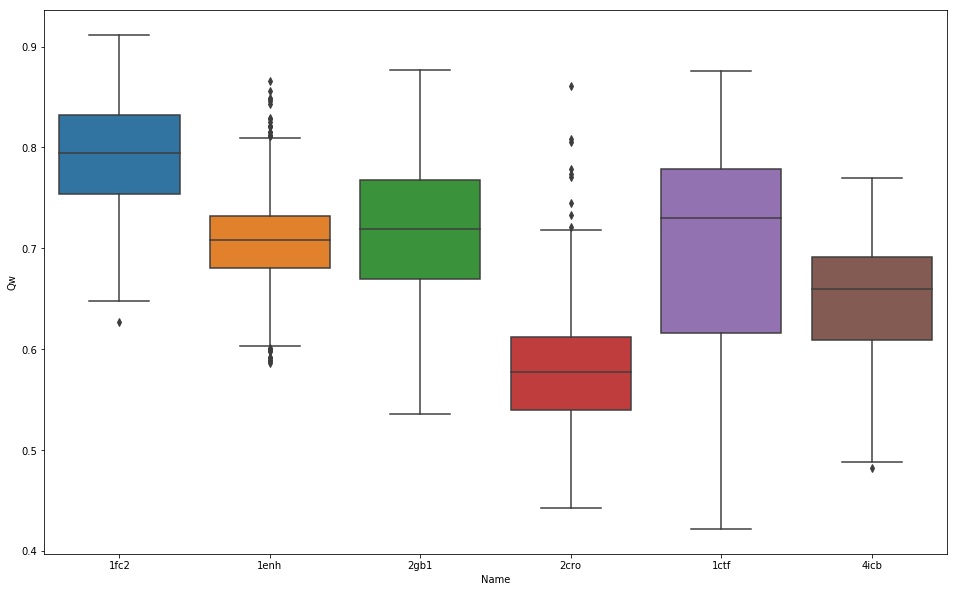

In [3]:
pre = "/Users/weilu/Research/server/feb_2019/iterative_optimization_new_temp_range/"
simulationType = "newContact"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

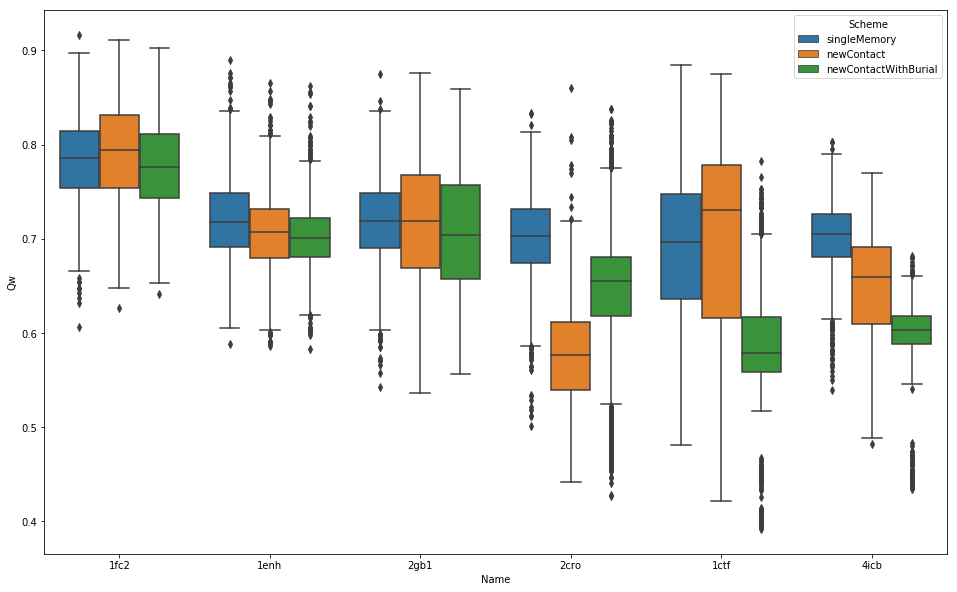

In [15]:
data = pd.read_csv("/Users/weilu/Research/data/optimization/single_memory_jan17.csv", index_col=0)
data2 = pd.read_csv("/Users/weilu/Research/data/optimization/single_02-20.csv", index_col=0)
data3 = pd.read_csv("/Users/weilu/Research/data/optimization/newContact_02-20.csv", index_col=0)
data4 = pd.read_csv("/Users/weilu/Research/data/optimization/top20_02-20.csv", index_col=0)
data5 = pd.read_csv("/Users/weilu/Research/data/optimization/newContactWithBurial_02-23.csv", index_col=0)
data6 = pd.read_csv("/Users/weilu/Research/data/optimization/filtered_gamma_iter1_02-13.csv", index_col=0)
data7 = pd.read_csv("/Users/weilu/Research/data/optimization/iter2_02-15.csv", index_col=0)
# d = pd.concat([data.assign(Scheme="single_memory"), data4.assign(Scheme="No contact")
#               , data2.assign(Scheme="fragMemory"), data3.assign(Scheme="newContact"), 
#                data5.assign(Scheme="iter1")
#               ])
d = pd.concat([
#                 data.assign(Scheme="single_memory"), 
                   data2.assign(Scheme="singleMemory"), 
                 data3.assign(Scheme="newContact"), 
#                data4.assign(Scheme="Top20, New Frag"),
               data5.assign(Scheme="newContactWithBurial"),
#                data6.assign(Scheme="filtered_iter1"),
#                data7.assign(Scheme="iter2")
              ])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)

In [39]:
pre = "/Users/weilu/Research/server/feb_2019/iterative_optimization_3/"
simulationType = "iter2"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")

In [37]:
pre = "/Users/weilu/Research/server/feb_2019/iterative_optimization_2/"
simulationType = "filtered_gamma_iter1"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")

In [35]:
pre = "/Users/weilu/Research/server/feb_2019/iterative_optimization_2/"
simulationType = "iter1"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")

# small improvement from newContact to iter1.

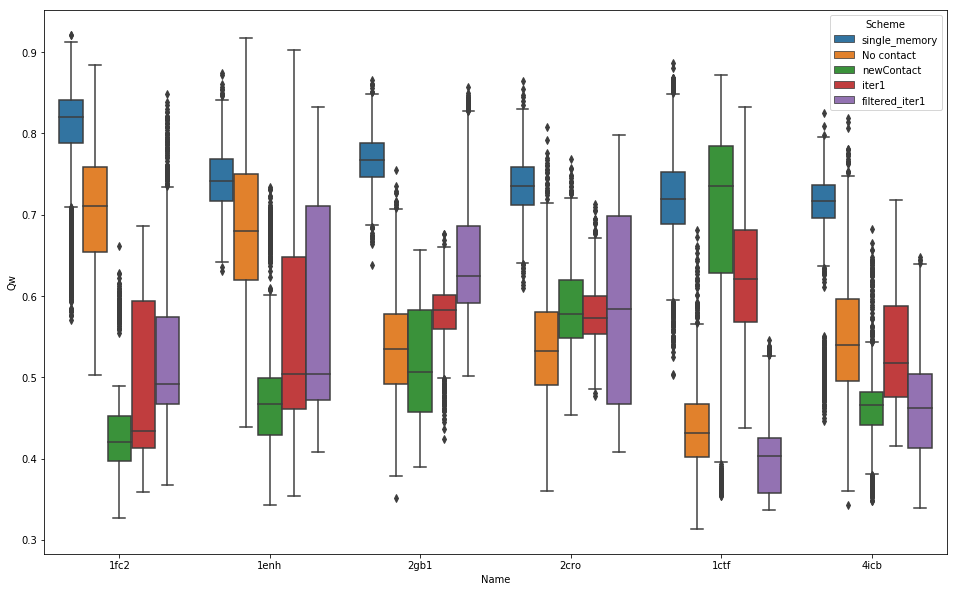

In [41]:
data = pd.read_csv("/Users/weilu/Research/data/optimization/single_memory_jan17.csv", index_col=0)
data2 = pd.read_csv("/Users/weilu/Research/data/optimization/all_simulations_01-31.csv", index_col=0)
data3 = pd.read_csv("/Users/weilu/Research/data/optimization/newContact_singleFrag_02-01.csv", index_col=0)
data4 = pd.read_csv("/Users/weilu/Research/data/optimization/FragOnly_01-23.csv", index_col=0)
data5 = pd.read_csv("/Users/weilu/Research/data/optimization/iter1_02-13.csv", index_col=0)
data6 = pd.read_csv("/Users/weilu/Research/data/optimization/filtered_gamma_iter1_02-13.csv", index_col=0)
data7 = pd.read_csv("/Users/weilu/Research/data/optimization/iter2_02-15.csv", index_col=0)
# d = pd.concat([data.assign(Scheme="single_memory"), data4.assign(Scheme="No contact")
#               , data2.assign(Scheme="fragMemory"), data3.assign(Scheme="newContact"), 
#                data5.assign(Scheme="iter1")
#               ])
d = pd.concat([data.assign(Scheme="single_memory"), data4.assign(Scheme="No contact")
               , data3.assign(Scheme="newContact"), 
               data5.assign(Scheme="iter1"),
               data6.assign(Scheme="filtered_iter1"),
#                data7.assign(Scheme="iter2")
              ])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)

# same as above, but the starting structure is different.

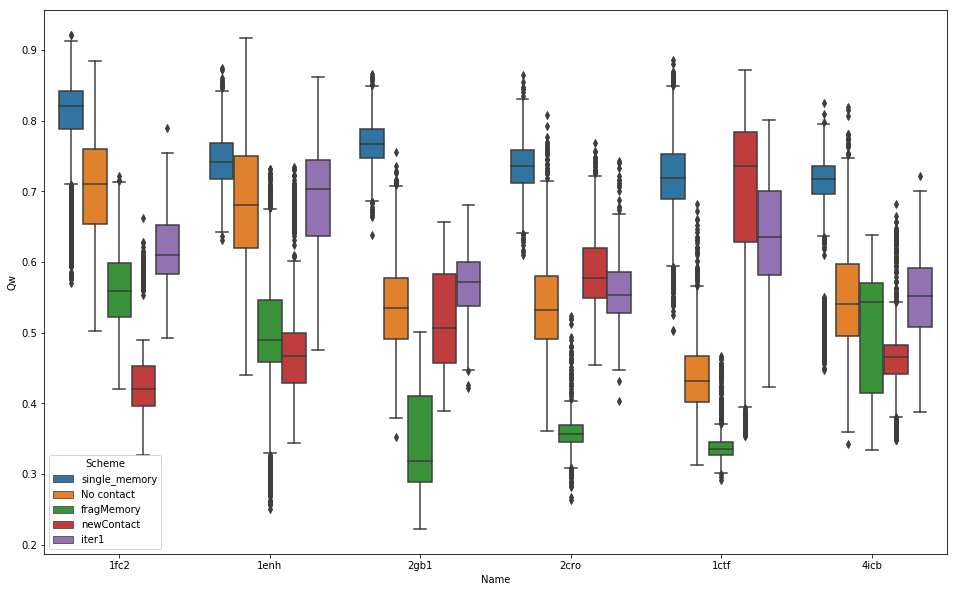

In [27]:
data = pd.read_csv("/Users/weilu/Research/data/optimization/single_memory_jan17.csv", index_col=0)
data2 = pd.read_csv("/Users/weilu/Research/data/optimization/all_simulations_01-31.csv", index_col=0)
data3 = pd.read_csv("/Users/weilu/Research/data/optimization/newContact_singleFrag_02-01.csv", index_col=0)
data4 = pd.read_csv("/Users/weilu/Research/data/optimization/FragOnly_01-23.csv", index_col=0)
data5 = pd.read_csv("/Users/weilu/Research/data/optimization/native_02-07.csv", index_col=0)
d = pd.concat([data.assign(Scheme="single_memory"), data4.assign(Scheme="No contact")
              , data2.assign(Scheme="fragMemory"), data3.assign(Scheme="newContact"), 
               data5.assign(Scheme="iter1")
              ])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)

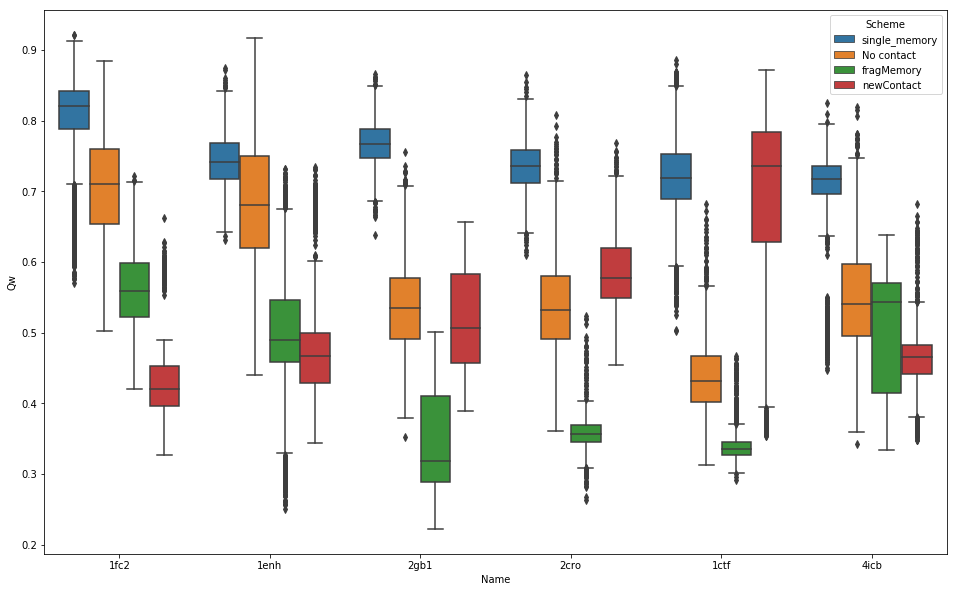

In [6]:
data = pd.read_csv("/Users/weilu/Research/data/optimization/single_memory_jan17.csv", index_col=0)
data2 = pd.read_csv("/Users/weilu/Research/data/optimization/all_simulations_01-31.csv", index_col=0)
data3 = pd.read_csv("/Users/weilu/Research/data/optimization/newContact_singleFrag_02-01.csv", index_col=0)
data4 = pd.read_csv("/Users/weilu/Research/data/optimization/FragOnly_01-23.csv", index_col=0)
d = pd.concat([data.assign(Scheme="single_memory"), data4.assign(Scheme="No contact")
              , data2.assign(Scheme="fragMemory"), data3.assign(Scheme="newContact"),
              ])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)

In [8]:
pre = "/Users/weilu/Research/server/jan_2019/iterative_optimization_another_set/"
simulationType = "newContact_singleFrag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")

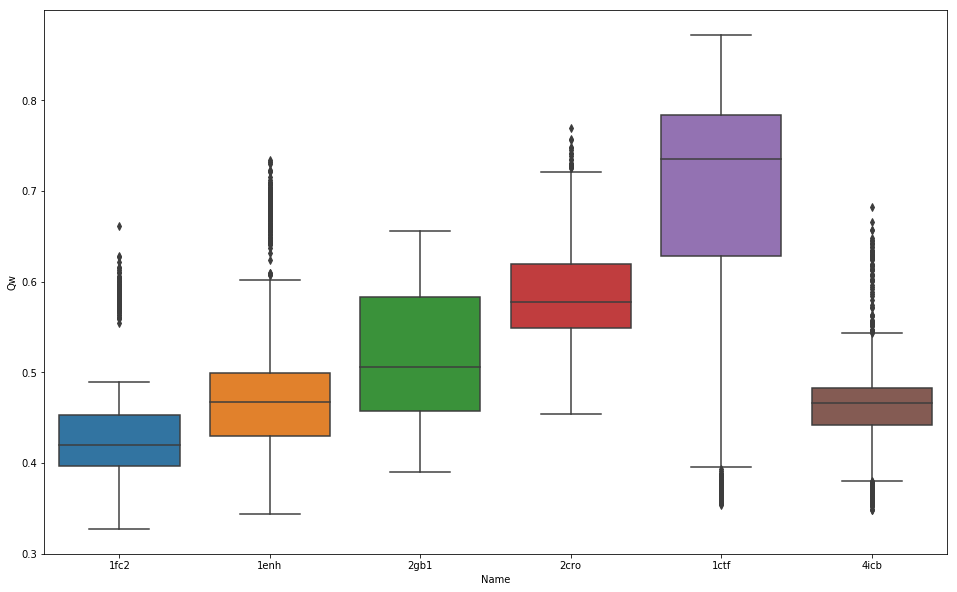

In [10]:
sns.boxplot("Name", "Qw", data=data)

In [11]:
pre = "/Users/weilu/Research/server/jan_2019/iterative_optimization_another_set/"
simulationType = "top5"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")

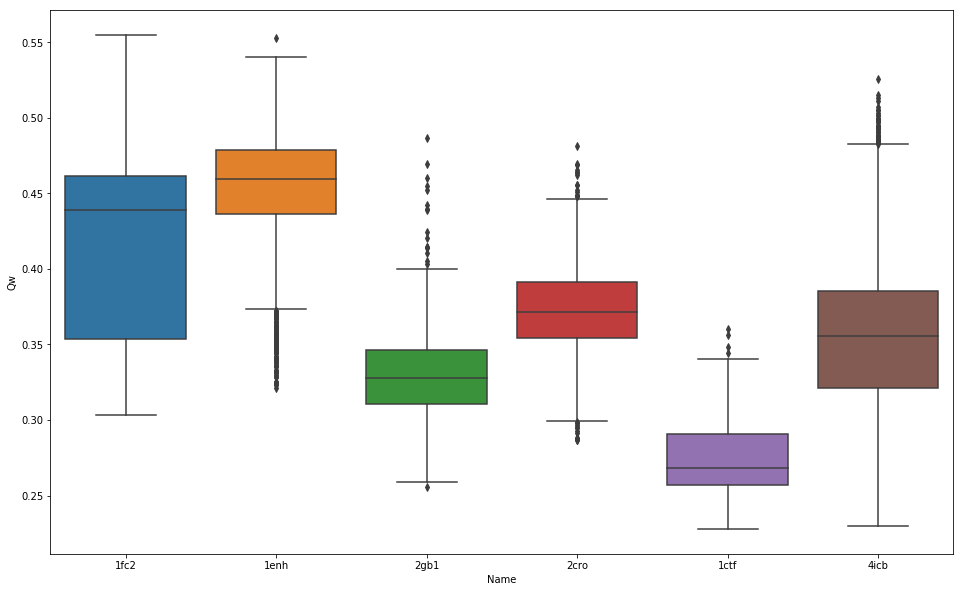

In [12]:
sns.boxplot("Name", "Qw", data=data)

In [13]:
pre = "/Users/weilu/Research/server/jan_2019/iterative_optimization_another_set/"
simulationType = "top5_noeven"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")

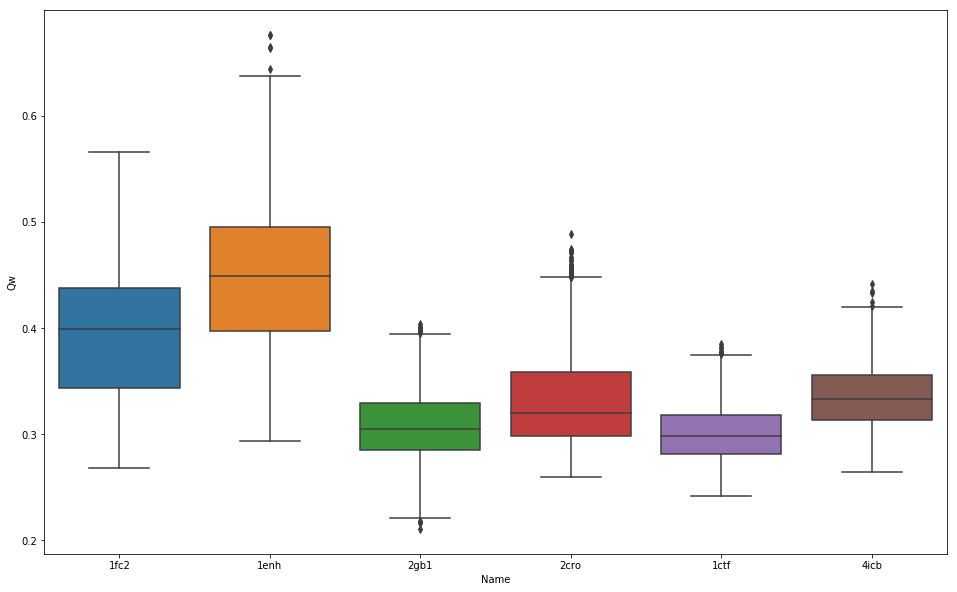

In [14]:
sns.boxplot("Name", "Qw", data=data)

In [5]:
pre = "/Users/weilu/Research/server/jan_2019/iterative_optimization_another_set_fragMemory/"
simulationType = "all_simulations"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")

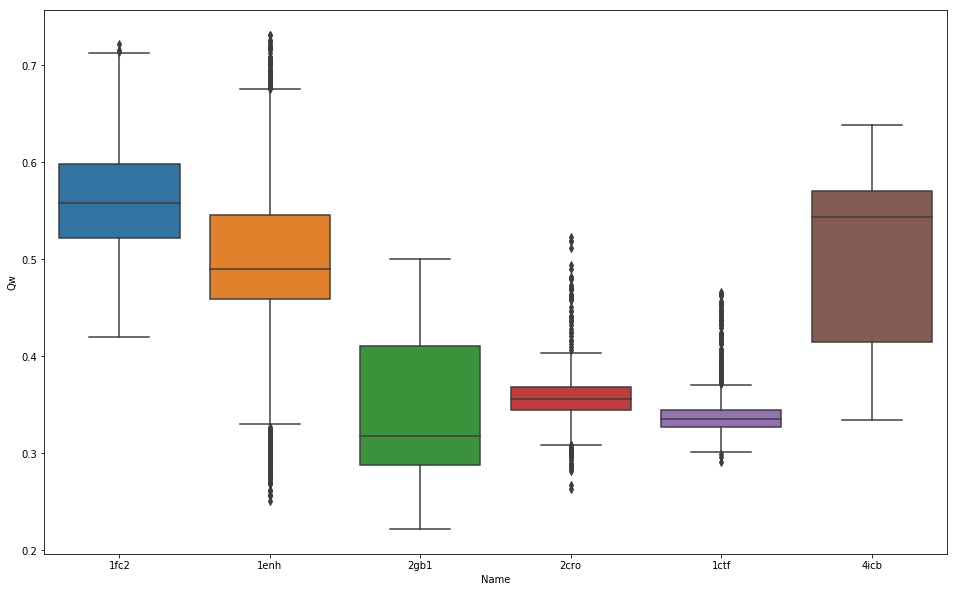

In [6]:
sns.boxplot("Name", "Qw", data=data)

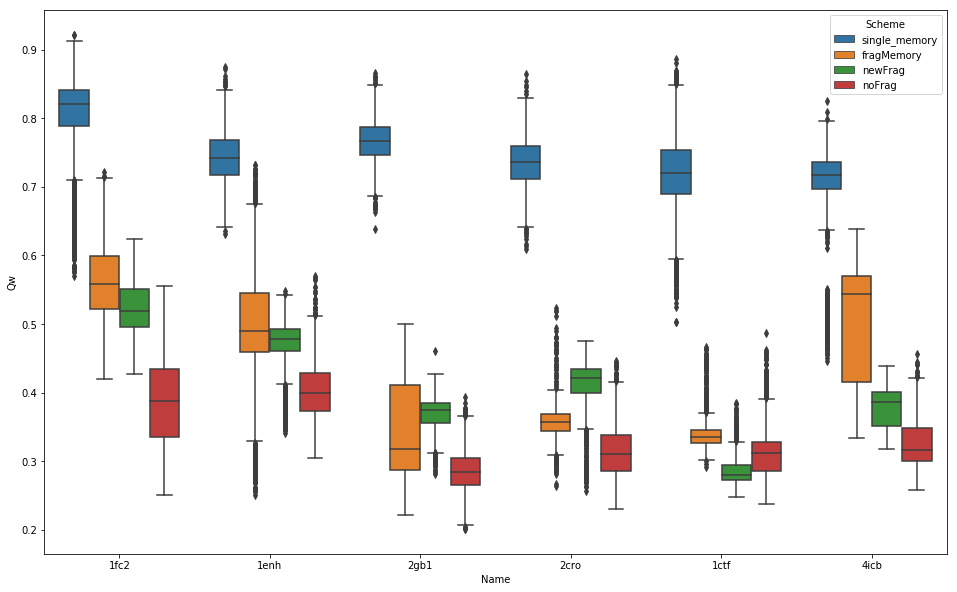

In [7]:
data = pd.read_csv("/Users/weilu/Research/data/optimization/single_memory_jan17.csv", index_col=0)
data2 = pd.read_csv("/Users/weilu/Research/data/optimization/all_simulations_01-31.csv", index_col=0)
data3 = pd.read_csv("/Users/weilu/Research/data/optimization/newFrag_01-23.csv", index_col=0)
data4 = pd.read_csv("/Users/weilu/Research/data/optimization/noFrag_single_memory_jan17.csv", index_col=0)
d = pd.concat([data.assign(Scheme="single_memory")
              , data2.assign(Scheme="fragMemory"), data3.assign(Scheme="newFrag"),
              data4.assign(Scheme="noFrag")])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)

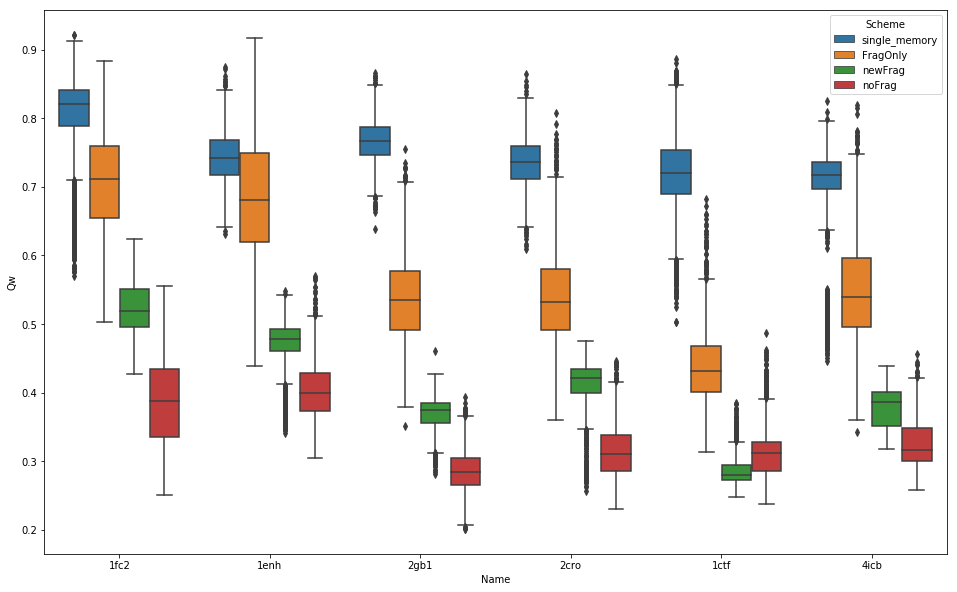

In [24]:
data = pd.read_csv("/Users/weilu/Research/data/optimization/single_memory_jan17.csv", index_col=0)
data2 = pd.read_csv("/Users/weilu/Research/data/optimization/FragOnly_01-23.csv", index_col=0)
data3 = pd.read_csv("/Users/weilu/Research/data/optimization/newFrag_01-23.csv", index_col=0)
data4 = pd.read_csv("/Users/weilu/Research/data/optimization/noFrag_single_memory_jan17.csv", index_col=0)
d = pd.concat([data.assign(Scheme="single_memory")
              , data2.assign(Scheme="FragOnly"), data3.assign(Scheme="newFrag"),
              data4.assign(Scheme="noFrag")])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)

In [20]:
pre = "/Users/weilu/Research/server/jan_2019/iterative_optimization_another_set/"
simulationType = "FragOnly"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")

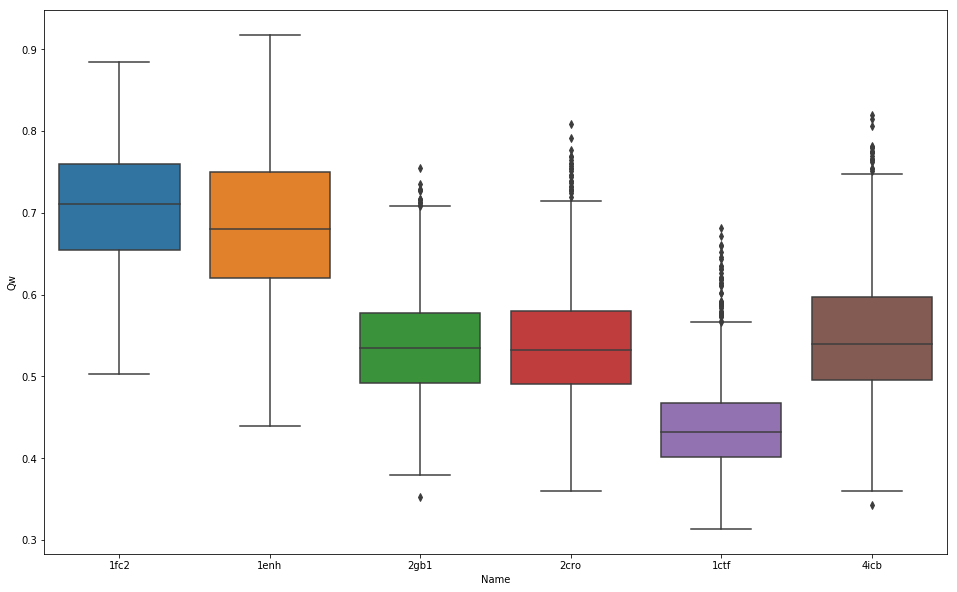

In [21]:
sns.boxplot("Name", "Qw", data=data)

In [18]:
pre = "/Users/weilu/Research/server/jan_2019/iterative_optimization_another_set/"
simulationType = "newFrag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{today}.csv")

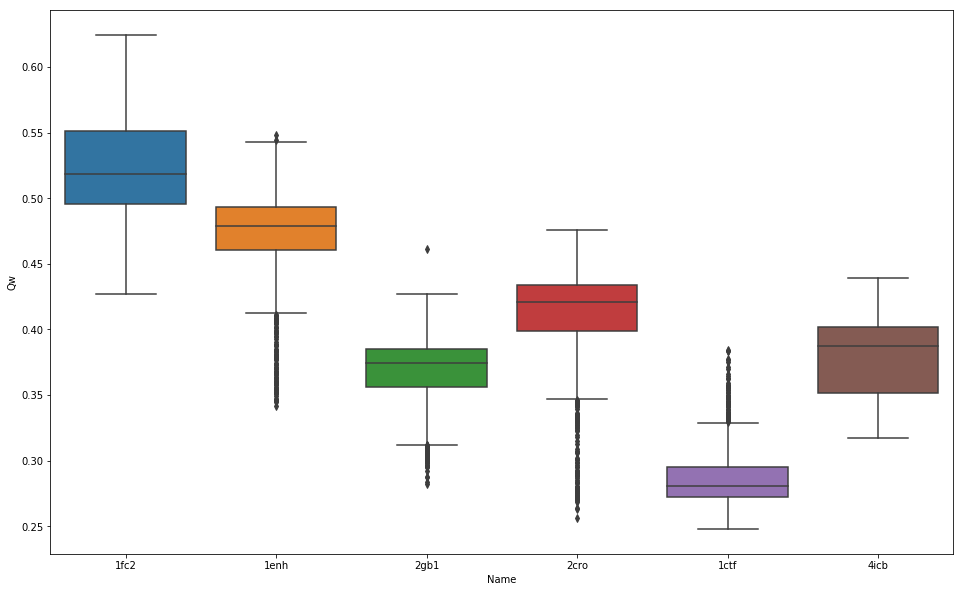

In [19]:
sns.boxplot("Name", "Qw", data=data)

In [9]:
pre = "/Users/weilu/Research/server/jan_2019/iterative_optimization_another_set/"
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType="newContact_noFrag")
data.reset_index(drop=True).to_csv("/Users/weilu/Research/data/optimization/newContact_noFrag_single_memory_jan17.csv")

File b'/Users/weilu/Research/server/jan_2019/iterative_optimization_another_set/newContact_noFrag/2cro/simulation/14/0/wham.dat' does not exist


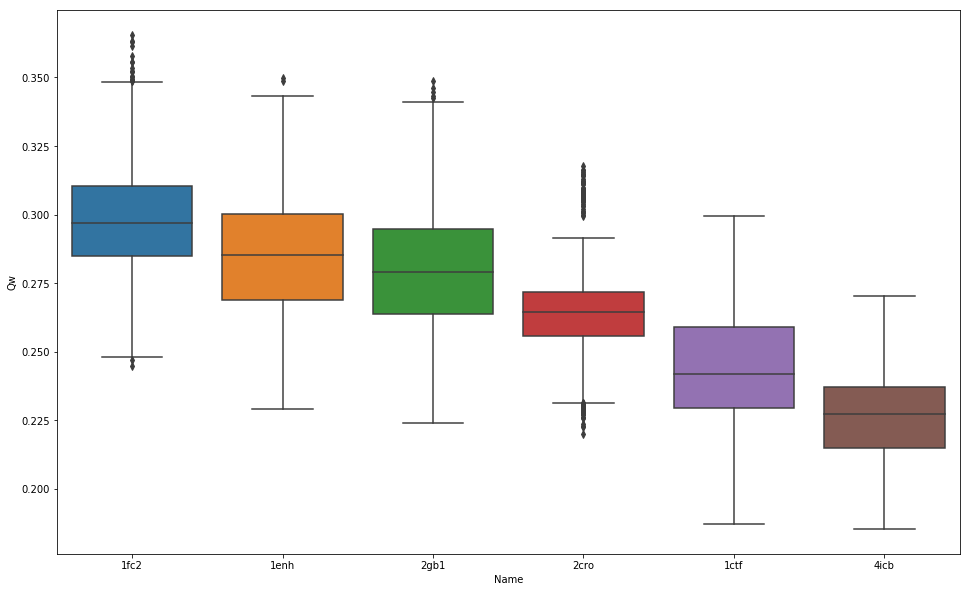

In [10]:
sns.boxplot("Name", "Qw", data=data)

In [7]:
pre = "/Users/weilu/Research/server/jan_2019/iterative_optimization_another_set/"
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType="noFrag")
data.reset_index(drop=True).to_csv("/Users/weilu/Research/data/optimization/noFrag_single_memory_jan17.csv")

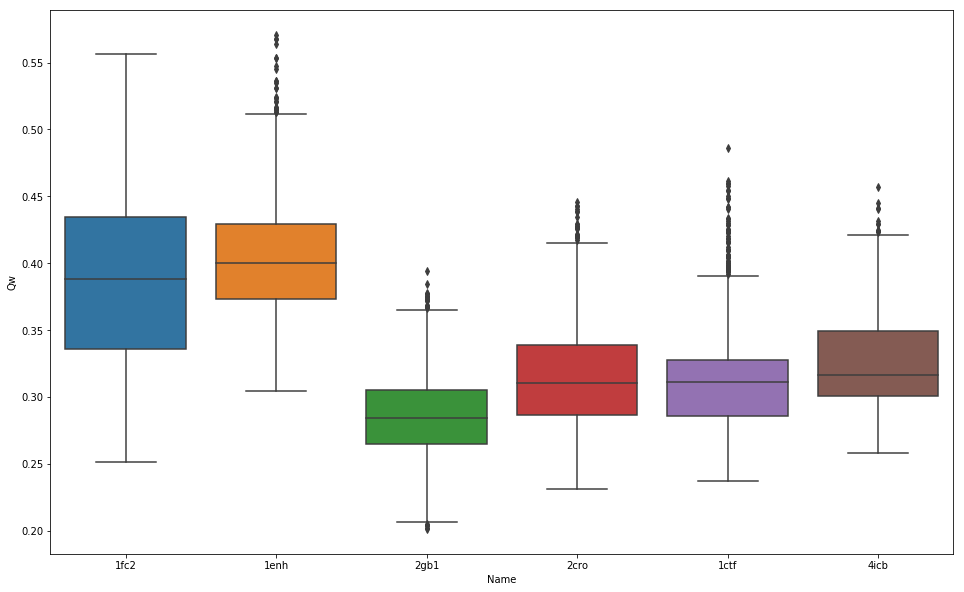

In [8]:
sns.boxplot("Name", "Qw", data=data)

In [3]:
pre = "/Users/weilu/Research/server/jan_2019/iterative_optimization_another_set/"
# pdb_list = "1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", ")
pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list)
data.reset_index(drop=True).to_csv("/Users/weilu/Research/data/optimization/single_memory_jan17.csv")

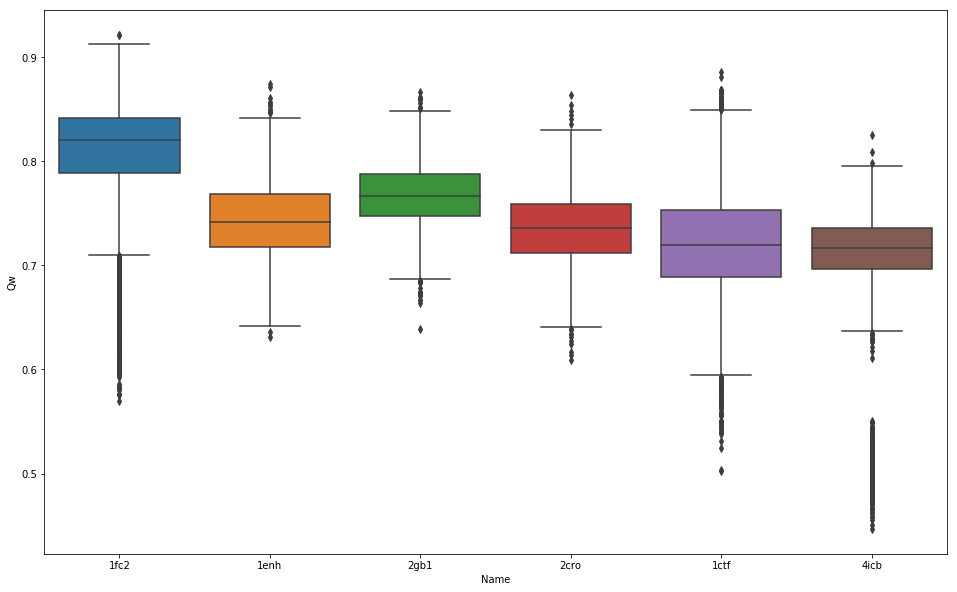

In [6]:
sns.boxplot("Name", "Qw", data=data)

In [ ]:
# data = pd.read_csv("/Users/weilu/Research/data/optimization/single_memory_no_gamma.csv", index_col=0)
# data2 = pd.read_csv("/Users/weilu/Research/data/optimization/single_memory_old_gamma.csv", index_col=0)
# data3 = pd.read_csv("/Users/weilu/Research/data/optimization/single_memory_new_gamma.csv", index_col=0)
# d = pd.concat([data.assign(Scheme="no_gamma")
#               , data3.assign(Scheme="new_gamma"), data2.assign(Scheme="old_gamma")])
# sns.boxplot("Name", "Qw", hue="Scheme", data=d)